In [1]:
import sys
sys.path.append(
    "/Users/jkingslake/Documents/science/ApRES/xapres/")
#import importlib
#importlib.reload(xa)

In [2]:
import xapres as xa

In [5]:
ds = xa.load.generate_xarray(attended=True, 
                directory=["../../data/sample/polarmetric"], 
                polarmetric=True)

In [3]:
ds2 = xa.load.generate_xarray(directory='../../data/sample/single_dat_file/', 
            file_numbers_to_process = [0], 
            bursts_to_process=[0],
            max_range=1400
            )
ds2

<xarray.Dataset>
Dimensions:          (time: 1, chirp_time: 40001, chirp_num: 100,
                      attenuator_setting_pair: 1, profile_range: 6658)
Coordinates:
  * time             (time) datetime64[ns] 2023-01-05T03:16:15
  * chirp_time       (chirp_time) float64 0.0 2.5e-05 5e-05 ... 1.0 1.0 1.0
  * profile_range    (profile_range) float64 0.0 0.2103 ... 1.4e+03 1.4e+03
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
    filename         (time) <U57 '../../data/sample/single_dat_file/DATA2023-...
    burst_number     (time) int64 0
    AFGain           (attenuator_setting_pair) int64 -4
    attenuator       (attenuator_setting_pair) float64 22.0
    orientation      (time) <U7 'unknown'
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    chirp            (time, chirp_time, chirp_num, attenuator_setting_pair) float64 ...
    profile          (time, profile_range, chirp_num, attenuator_setting_pair) complex128 ...
    latitude         (time) float64 0.0
    longitude        (time) float64 0.0
    battery_voltage  (time) float64 0.0
    temperature_1    (time) float64 2.891
    temperature_2    (time) float64 511.8

In [5]:
chirp = ds2.chirp.isel(chirp_num=[0])

chirp.values.squeeze().shape

(40001,)

In [6]:
pwd

'/Users/jkingslake/Documents/science/ApRES/xapres_package/notebooks/new_initalization_notes'

In [7]:
chirp.sonify(save=True)

In [15]:
import numpy as np
chirp = ds2.chirp.isel(chirp_num=[0])
samplerate =  chirp.chirp_time.size / (chirp.chirp_time[-1].values - chirp.chirp_time[0].values) 
samplerate = samplerate.astype(int)
samplerate

40001

In [33]:
chirp.chirp_time[-1] - chirp.chirp_time[0]

<xarray.DataArray 'chirp_time' ()>
array(1.)

In [3]:
xapres = xa.load.xapres(directory='gs://ldeo-glaciology/GL_apres_2022', 
            remote_load = True,
            file_numbers_to_process = [0], 
            bursts_to_process=[0],
            loglevel='debug')

DEBUG    20:47:11 	 load.py @function _setup_logging line 642 - Stream logging level set to DEBUG
DEBUG    20:47:11 	 load.py @function _setup_logging line 643 - Add console handler to logger
DEBUG    20:47:11 	 load.py @function _setup_logging line 656 - File logging level set to DEBUG
DEBUG    20:47:11 	 load.py @function load_all line 218 - Start call to load_all with remote_load = True, directory = gs://ldeo-glaciology/GL_apres_2022, file_numbers_to_process = [0], file_names_to_process = None, bursts_to_process = [0], attended = False
DEBUG    20:47:11 	 load.py @function list_files line 170 - Find all the dat files in the directory gs://ldeo-glaciology/GL_apres_2022 with remote_load = True
DEBUG    20:47:16 	 load.py @function list_files line 184 - Finish call to list_files. Found 1015 files
DEBUG    20:47:16 	 load.py @function subset_files line 281 - Subset files to [0]
DEBUG    20:47:16 	 load.py @function load_all line 231 - Attended is False, so starting loop over dat files
D

In [ ]:
xapres

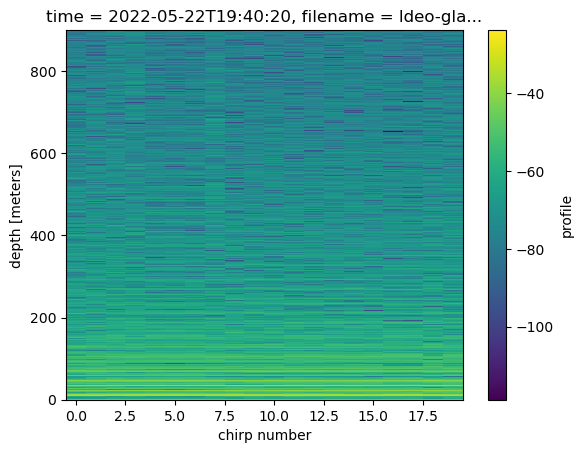

In [12]:
xapres.profile.db()[:,:,:,0].plot()